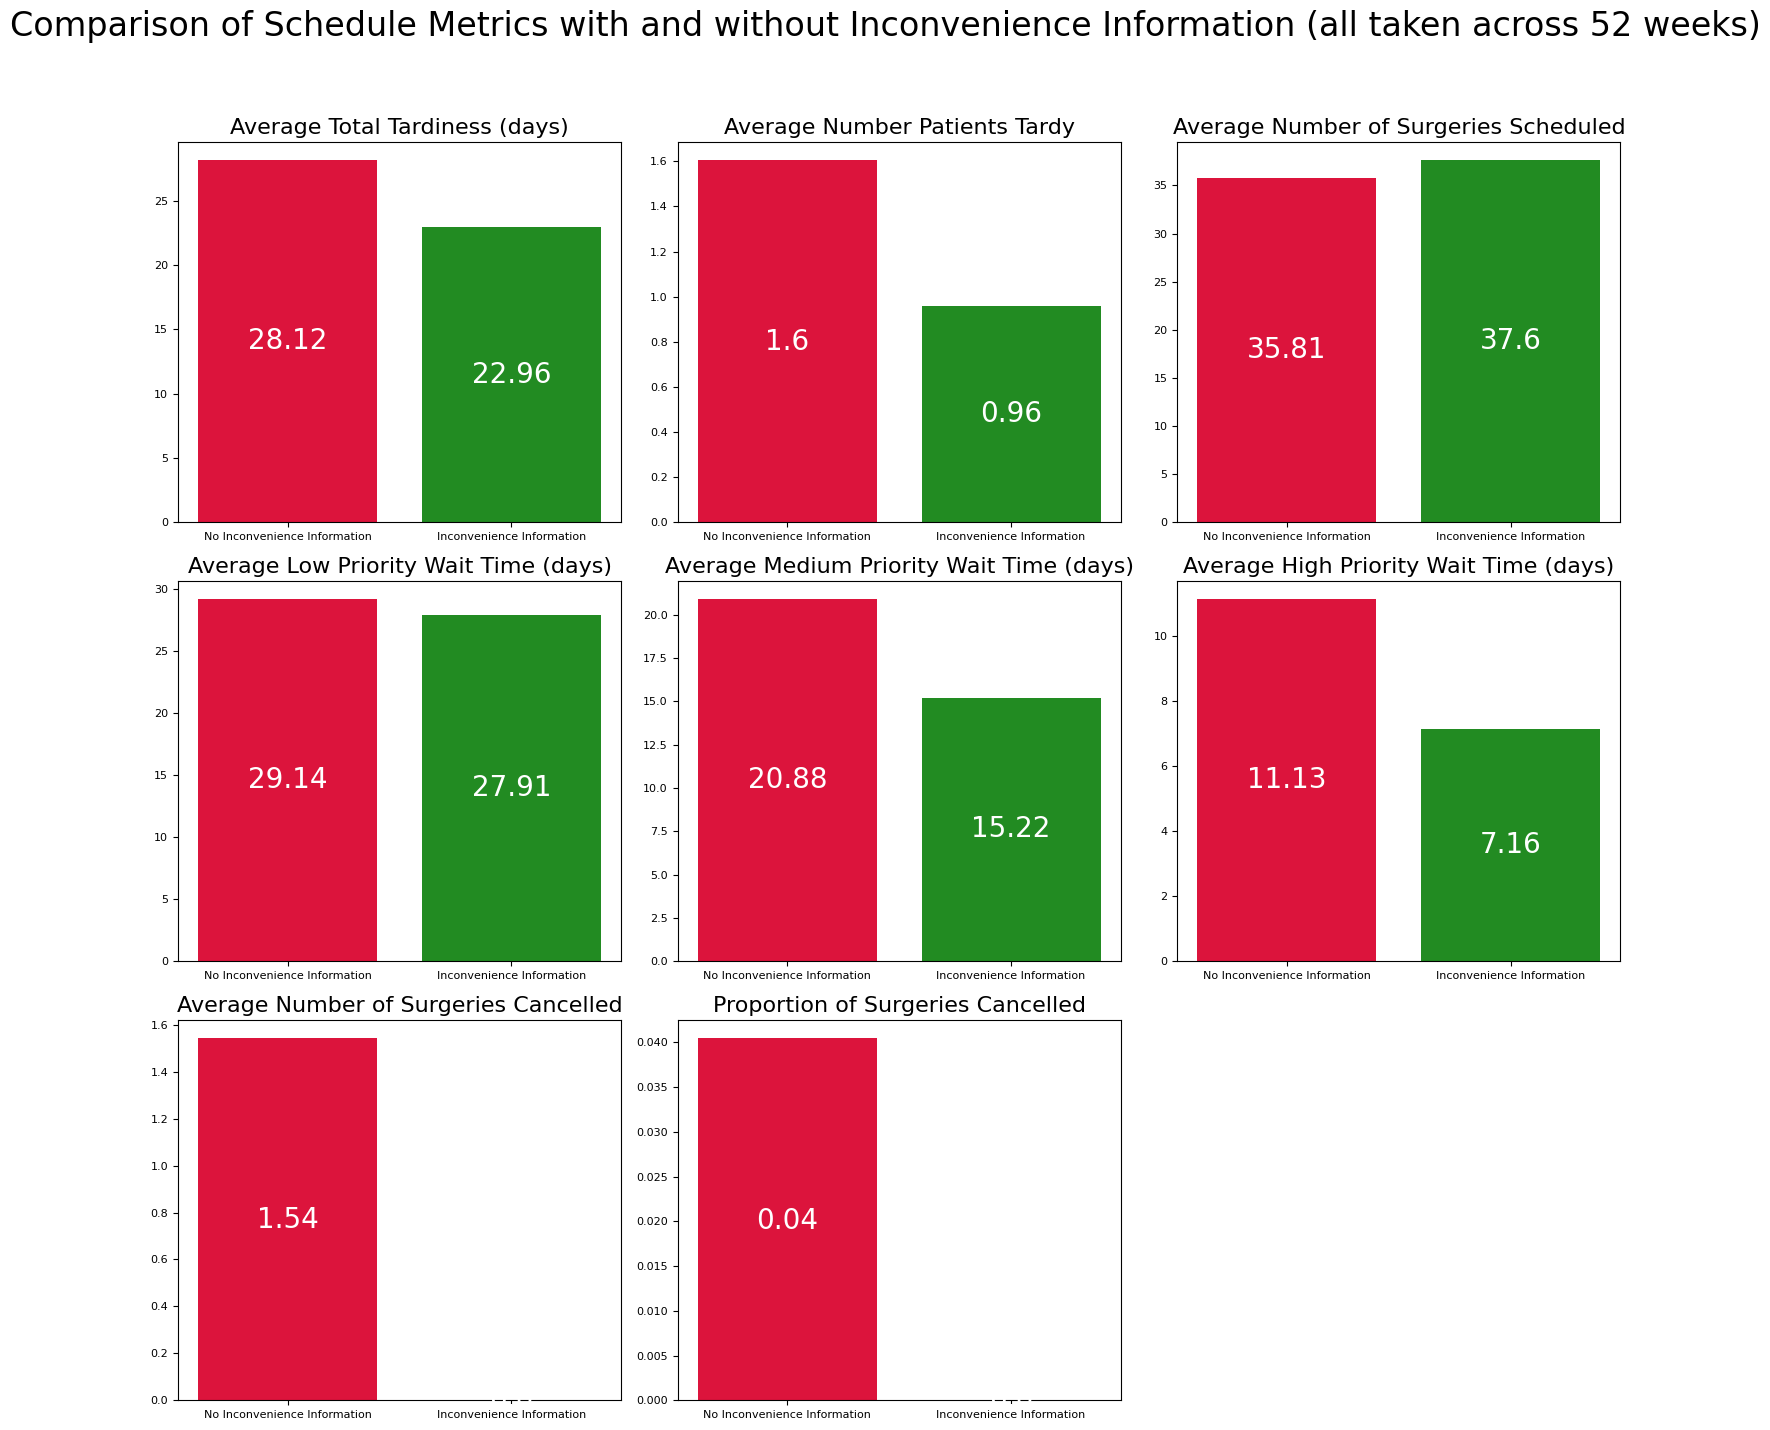

In [51]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

plt.style.use('presentation.mplstyle')

# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))

# Check if the path is correct
csv_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0.csv")

avg_values = pd.read_csv(csv_path)

# Labels for the bars
labels = ['No Inconvenience Information', 'Inconvenience Information']

categories = [
    'total tardiness', 'number of patients tardy', 'number of surgeries scheduled', 
    'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 'average wait time 0.66 < priority',
    'num surgeries cancelled', 'cancelation proportion'
]

title_map = {
    'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
    'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
    'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
    'total tardiness': 'Average Total Tardiness (days)', 
    'number of patients tardy': 'Average Number Patients Tardy', 
    'number of surgeries scheduled': 'Average Number of Surgeries Scheduled', 
    'num surgeries cancelled': 'Average Number of Surgeries Cancelled',
    'cancelation proportion': 'Proportion of Surgeries Cancelled'
}

# Define colors for each label
color_map = {
    'Inconvenience Information': '#228B22',
    'No Inconvenience Information': '#DC143C',
}

# Get colors for each label
colors = [color_map[label] for label in labels]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each bar graph
for i in range(8):
    bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
    axes[i].set_title(title_map[categories[i]], fontsize=16)
    # Add labels
    for bar in bars:
        yval = round(bar.get_height(), 2)
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=20)

# Hide the last two empty subplots
for j in range(8, 9):
    fig.delaxes(axes[j])

# Create custom legend handles
# handles = [Patch(color=color_map[label], label=label) for label in labels]

# Add the legend to the figure
# fig.legend(handles=handles, loc='upper right', title='Labels')
fig.suptitle("Comparison of Schedule Metrics with and without Inconvenience Information (all taken across 52 weeks)", fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()



In [ ]:
import pandas as pd
from pathlib import Path
import os

# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))

# Check if the path is correct
csv_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0.csv")
print(f"CSV Path: {csv_path}")

avg_values = pd.read_csv(csv_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data in DataFrame
data = {
    'perfect_information_bool': ['FALSE', 'TRUE'],
    'total tardiness': [28.125, 22.95833333],
    'number of patients tardy': [1.604166667, 0.958333333],
    'average wait time (priority < 0.33)': [29.1410418, 27.90874692],
    'average wait_time (0.33 < priority < 0.66)': [20.87891589, 15.21842533],
    'average wait time 0.66 < priority': [11.12807887, 7.157231303],
    'number of surgeries scheduled': [35.8125, 37.60416667],
    'num surgeries cancelled': [1.541666667, 0],
    'cancelation proportion': [0.040432404, 0]
}

avg_values = pd.DataFrame(data)

# Categories to plot
categories = [
    'total tardiness', 'number of patients tardy', 
    'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 
    'average wait time 0.66 < priority', 'number of surgeries scheduled', 
    'num surgeries cancelled', 'cancelation proportion'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot data
for i, category in enumerate(categories):
    ax = axes[i]
    x = np.arange(2)  # There are two categories: FALSE and TRUE
    print(avg_values[avg_values['perfect_information_bool' == True]])
    ax.bar(1 + 0.2, avg_values[avg_values['perfect_information_bool' == True]][category], color='r', width=0.4, label='Inconvenience Information')
    ax.bar(2 - 0.2, avg_values[avg_values['perfect_information_bool' == False]][category], color='b', width=0.4, label='No Inconvenience Information')
    ax.set_xticks(x)
    ax.set_xticklabels(avg_values['perfect_information_bool'])
    ax.set_title(category)
    ax.legend()

# Hide the last empty subplot
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
